# Clustering

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN, KMeans

%matplotlib inline

In [3]:
df = pd.read_csv('../data/merged_tracks.csv')
df.head()

,artist_name,artist_genre,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Frank Ocean,"['hip hop', 'lgbtq+ hip hop', 'neo soul', 'pop']",Lost,3GZD6HmiNUhxXYf8Gch723,85,0.913,0.603,8,-4.892,1,0.2260,0.02720,0.000503,0.1670,0.497,123.061,234093,4
1,David Bowie,"['art rock', 'classic rock', 'glam rock', 'per...",Five Years - 2012 Remaster,1JIzFhI9Lt5FyslawmHCBi,59,0.460,0.326,7,-10.699,1,0.0417,0.14200,0.000010,0.0449,0.321,152.531,283753,3
2,Kendrick Lamar,"['conscious hip hop', 'hip hop', 'rap', 'west ...",Money Trees,2HbKqm4o0w5wEeEFXm2sD4,79,0.716,0.531,7,-7.355,1,0.1220,0.07030,0.000000,0.2240,0.344,71.994,386907,4
3,Electro Dark Project,[],Year 2012,6AXz0oyVU4oXh9Tb98TXMd,0,0.501,0.687,0,-4.657,1,0.0494,0.00419,0.000031,0.1230,0.542,164.092,214164,4
4,Chief Keef,"['chicago bop', 'chicago drill', 'chicago rap'...",Love Sosa,01Lr5YepbgjXAWR9iOEyH1,80,0.772,0.413,0,-8.193,0,0.0890,0.03610,0.000000,0.1110,0.211,131.965,246213,4


In [4]:
df['dance_valence'] = df['danceability'] * df['valence']
df.head()

,artist_name,artist_genre,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,dance_valence
0,Frank Ocean,"['hip hop', 'lgbtq+ hip hop', 'neo soul', 'pop']",Lost,3GZD6HmiNUhxXYf8Gch723,85,0.913,0.603,8,-4.892,1,0.2260,0.02720,0.000503,0.1670,0.497,123.061,234093,4,0.453761
1,David Bowie,"['art rock', 'classic rock', 'glam rock', 'per...",Five Years - 2012 Remaster,1JIzFhI9Lt5FyslawmHCBi,59,0.460,0.326,7,-10.699,1,0.0417,0.14200,0.000010,0.0449,0.321,152.531,283753,3,0.147660
2,Kendrick Lamar,"['conscious hip hop', 'hip hop', 'rap', 'west ...",Money Trees,2HbKqm4o0w5wEeEFXm2sD4,79,0.716,0.531,7,-7.355,1,0.1220,0.07030,0.000000,0.2240,0.344,71.994,386907,4,0.246304
3,Electro Dark Project,[],Year 2012,6AXz0oyVU4oXh9Tb98TXMd,0,0.501,0.687,0,-4.657,1,0.0494,0.00419,0.000031,0.1230,0.542,164.092,214164,4,0.271542
4,Chief Keef,"['chicago bop', 'chicago drill', 'chicago rap'...",Love Sosa,01Lr5YepbgjXAWR9iOEyH1,80,0.772,0.413,0,-8.193,0,0.0890,0.03610,0.000000,0.1110,0.211,131.965,246213,4,0.162892


In [123]:
X = df[['danceability', 'popularity']]

In [124]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
km = KMeans(n_clusters = 2, random_state = 42)
km.fit(X_scaled)

KMeans(n_clusters=2, random_state=42)

In [125]:
df['cluster'] = km.labels_
df.head()

,artist_name,artist_genre,track_name,track_id,popularity,danceability,energy,key,loudness,mode,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,dance_valence,cluster,color
0,Frank Ocean,"['hip hop', 'lgbtq+ hip hop', 'neo soul', 'pop']",Lost,3GZD6HmiNUhxXYf8Gch723,85,0.913,0.603,8,-4.892,1,...,0.02720,0.000503,0.1670,0.497,123.061,234093,4,0.453761,0,green
1,David Bowie,"['art rock', 'classic rock', 'glam rock', 'per...",Five Years - 2012 Remaster,1JIzFhI9Lt5FyslawmHCBi,59,0.460,0.326,7,-10.699,1,...,0.14200,0.000010,0.0449,0.321,152.531,283753,3,0.147660,0,red
2,Kendrick Lamar,"['conscious hip hop', 'hip hop', 'rap', 'west ...",Money Trees,2HbKqm4o0w5wEeEFXm2sD4,79,0.716,0.531,7,-7.355,1,...,0.07030,0.000000,0.2240,0.344,71.994,386907,4,0.246304,0,green
3,Electro Dark Project,[],Year 2012,6AXz0oyVU4oXh9Tb98TXMd,0,0.501,0.687,0,-4.657,1,...,0.00419,0.000031,0.1230,0.542,164.092,214164,4,0.271542,1,blue
4,Chief Keef,"['chicago bop', 'chicago drill', 'chicago rap'...",Love Sosa,01Lr5YepbgjXAWR9iOEyH1,80,0.772,0.413,0,-8.193,0,...,0.03610,0.000000,0.1110,0.211,131.965,246213,4,0.162892,0,green


In [126]:
centroids = sc.inverse_transform(km.cluster_centers_)
centroids

array([[ 0.64200291, 70.09286502],
       [ 0.56424855, 11.0715521 ]])

In [127]:
centroids = pd.DataFrame(centroids, columns = ['danceability', 'popularity'])
centroids

,danceability,popularity
0,0.642003,70.092865
1,0.564249,11.071552


<Figure size 720x576 with 0 Axes>

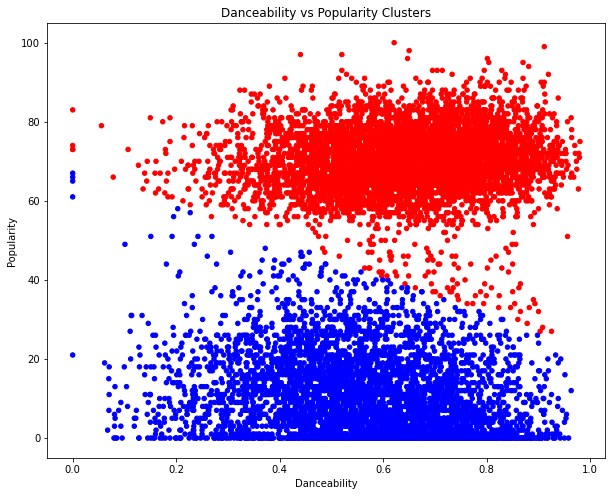

In [128]:
plt.figure(figsize=(10,8))

colors = ['red', 'blue'] #, 'green', 'purple']
df['color'] = df['cluster'].map(lambda p: colors[p])

ax = df.plot(kind='scatter', x = 'danceability', y = 'popularity',
    figsize=(10,8),c = df['color'])

centroids.plot(kind='scatter', x = 'danceability', y = 'popularity', 
    marker='*', c=colors, s=550, ax=ax)

plt.title('Danceability vs Popularity Clusters')
plt.xlabel('Danceability')
plt.ylabel('Popularity');

Text(0.5, 1.0, 'Inertia Scores')

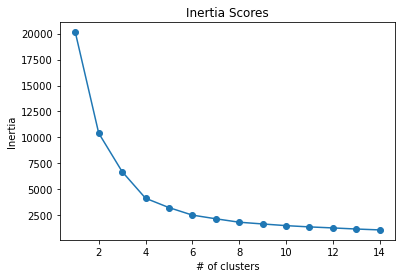

In [129]:
inertia_list = []

for k in range(1,15):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)
    
plt.plot(range(1,15), inertia_list, marker = 'o')
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.title('Inertia Scores')

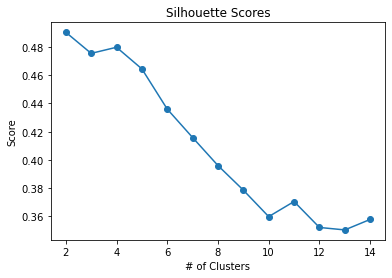

In [130]:
silhouette_list = []

for k in range(2,15):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    silhouette_list.append(silhouette_score(X_scaled, kmeans.labels_))
    
plt.plot(range(2, 15), silhouette_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Silhouette Scores');

In [131]:
silhouette_list

[0.49054256428896764,
 0.47555013496524867,
 0.4798882435501958,
 0.46453321349434884,
 0.4360067768851736,
 0.4158348206504895,
 0.3959604473539134,
 0.37852433074747777,
 0.35972128749515675,
 0.3704397257186534,
 0.3520401877509209,
 0.35029215788671153,
 0.35773667743807963]

---

In [38]:
X = df[['instrumentalness', 'popularity']]

In [39]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
km = KMeans(n_clusters = 4, random_state = 42)
km.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [40]:
df['cluster'] = km.labels_
df.head()

,artist_name,artist_genre,track_name,track_id,popularity,danceability,energy,key,loudness,mode,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,dance_valence,cluster,color
0,Frank Ocean,"['hip hop', 'lgbtq+ hip hop', 'neo soul', 'pop']",Lost,3GZD6HmiNUhxXYf8Gch723,85,0.913,0.603,8,-4.892,1,...,0.02720,0.000503,0.1670,0.497,123.061,234093,4,0.453761,0,red
1,David Bowie,"['art rock', 'classic rock', 'glam rock', 'per...",Five Years - 2012 Remaster,1JIzFhI9Lt5FyslawmHCBi,59,0.460,0.326,7,-10.699,1,...,0.14200,0.000010,0.0449,0.321,152.531,283753,3,0.147660,0,red
2,Kendrick Lamar,"['conscious hip hop', 'hip hop', 'rap', 'west ...",Money Trees,2HbKqm4o0w5wEeEFXm2sD4,79,0.716,0.531,7,-7.355,1,...,0.07030,0.000000,0.2240,0.344,71.994,386907,4,0.246304,0,red
3,Electro Dark Project,[],Year 2012,6AXz0oyVU4oXh9Tb98TXMd,0,0.501,0.687,0,-4.657,1,...,0.00419,0.000031,0.1230,0.542,164.092,214164,4,0.271542,1,green
4,Chief Keef,"['chicago bop', 'chicago drill', 'chicago rap'...",Love Sosa,01Lr5YepbgjXAWR9iOEyH1,80,0.772,0.413,0,-8.193,0,...,0.03610,0.000000,0.1110,0.211,131.965,246213,4,0.162892,0,red


In [41]:
centroids = sc.inverse_transform(km.cluster_centers_)
centroids

array([[8.01537148e-03, 7.02071986e+01],
       [2.96140849e-02, 1.06069328e+01],
       [8.27322230e-01, 1.14822592e+01],
       [7.44094527e-01, 6.76417910e+01]])

In [42]:
centroids = pd.DataFrame(centroids, columns = ['instrumentalness', 'popularity'])
centroids

,instrumentalness,popularity
0,0.008015,70.207199
1,0.029614,10.606933
2,0.827322,11.482259
3,0.744095,67.641791


<Figure size 720x576 with 0 Axes>

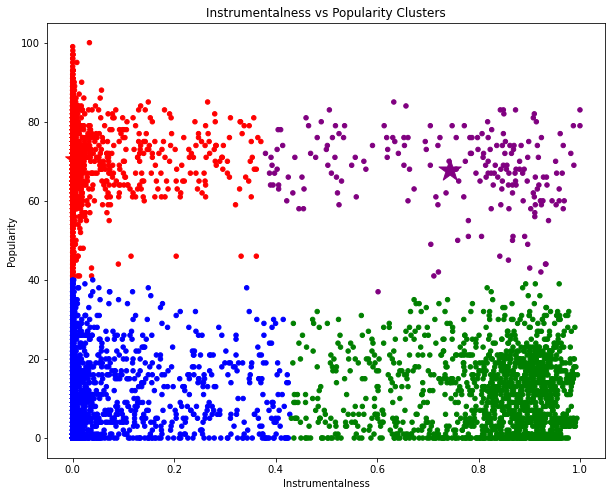

In [47]:
plt.figure(figsize=(10,8))

colors = ['red', 'blue', 'green', 'purple'] #, 'green', 'purple']
df['color'] = df['cluster'].map(lambda p: colors[p])

ax = df.plot(kind='scatter', x = 'instrumentalness', y = 'popularity',
    figsize=(10,8),c = df['color'])

centroids.plot(kind='scatter', x = 'instrumentalness', y = 'popularity', 
    marker='*', c=colors, s=550, ax=ax)

plt.title('Instrumentalness vs Popularity Clusters')
plt.xlabel('Instrumentalness')
plt.ylabel('Popularity');

Text(0.5, 1.0, 'Inertia Scores')

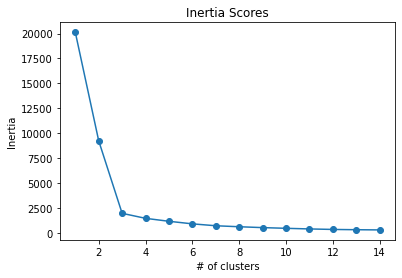

In [44]:
inertia_list = []

for k in range(1,15):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)
    
plt.plot(range(1,15), inertia_list, marker = 'o')
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.title('Inertia Scores')

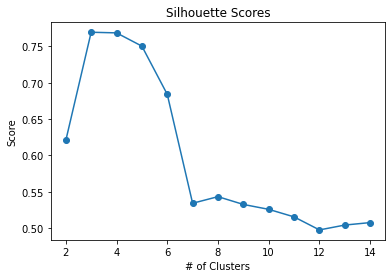

In [45]:
silhouette_list = []

for k in range(2,15):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    silhouette_list.append(silhouette_score(X_scaled, kmeans.labels_))
    
plt.plot(range(2, 15), silhouette_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Silhouette Scores');

In [37]:
silhouette_list

[0.6206018339921842,
 0.7692301435322773,
 0.7683658482376808,
 0.7501655390362792,
 0.683985031179947,
 0.5344103954096756,
 0.5434752474570838,
 0.5327985451264007,
 0.5260678735052103,
 0.5157039560170814,
 0.497811908405432,
 0.50448105862083,
 0.5078729677206397]

---

In [62]:
X = df[['loudness', 'popularity']]

In [63]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [64]:
df['cluster'] = km.labels_
df.head()

,artist_name,artist_genre,track_name,track_id,popularity,danceability,energy,key,loudness,mode,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,dance_valence,cluster,color
0,Frank Ocean,"['hip hop', 'lgbtq+ hip hop', 'neo soul', 'pop']",Lost,3GZD6HmiNUhxXYf8Gch723,85,0.913,0.603,8,-4.892,1,...,0.02720,0.000503,0.1670,0.497,123.061,234093,4,0.453761,1,blue
1,David Bowie,"['art rock', 'classic rock', 'glam rock', 'per...",Five Years - 2012 Remaster,1JIzFhI9Lt5FyslawmHCBi,59,0.460,0.326,7,-10.699,1,...,0.14200,0.000010,0.0449,0.321,152.531,283753,3,0.147660,1,blue
2,Kendrick Lamar,"['conscious hip hop', 'hip hop', 'rap', 'west ...",Money Trees,2HbKqm4o0w5wEeEFXm2sD4,79,0.716,0.531,7,-7.355,1,...,0.07030,0.000000,0.2240,0.344,71.994,386907,4,0.246304,1,blue
3,Electro Dark Project,[],Year 2012,6AXz0oyVU4oXh9Tb98TXMd,0,0.501,0.687,0,-4.657,1,...,0.00419,0.000031,0.1230,0.542,164.092,214164,4,0.271542,0,red
4,Chief Keef,"['chicago bop', 'chicago drill', 'chicago rap'...",Love Sosa,01Lr5YepbgjXAWR9iOEyH1,80,0.772,0.413,0,-8.193,0,...,0.03610,0.000000,0.1110,0.211,131.965,246213,4,0.162892,1,blue


In [65]:
centroids = sc.inverse_transform(km.cluster_centers_)
centroids

array([[ -7.52664856,  10.79469523],
       [ -6.55078702,  70.2317968 ],
       [-18.98748792,  20.25845411]])

In [66]:
centroids = pd.DataFrame(centroids, columns = ['loudness', 'popularity'])
centroids

,loudness,popularity
0,-7.526649,10.794695
1,-6.550787,70.231797
2,-18.987488,20.258454


<Figure size 720x576 with 0 Axes>

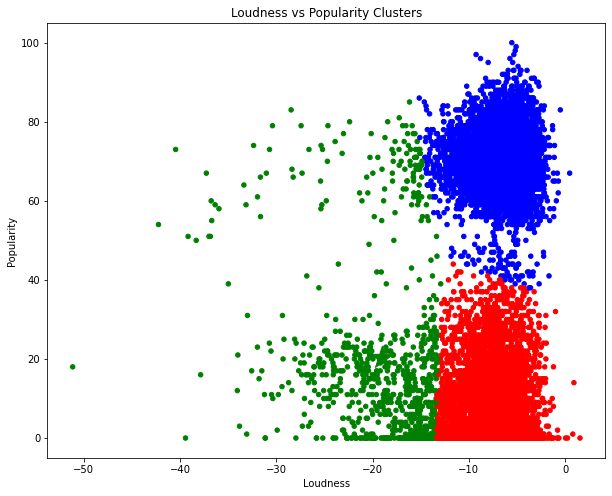

In [67]:
plt.figure(figsize=(10,8))

colors = ['red', 'blue', 'green'] #, 'green', 'purple']
df['color'] = df['cluster'].map(lambda p: colors[p])

ax = df.plot(kind='scatter', x = 'loudness', y = 'popularity',
    figsize=(10,8),c = df['color'])

centroids.plot(kind='scatter', x = 'loudness', y = 'popularity', 
    marker='*', c=colors, s=550, ax=ax)

plt.title('Loudness vs Popularity Clusters')
plt.xlabel('Loudness')
plt.ylabel('Popularity');

Text(0.5, 1.0, 'Inertia Scores')

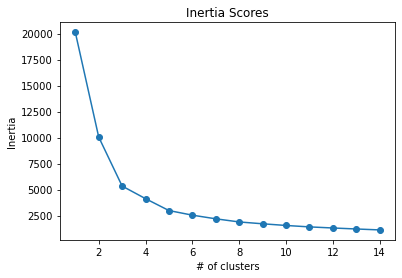

In [68]:
inertia_list = []

for k in range(1,15):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)
    
plt.plot(range(1,15), inertia_list, marker = 'o')
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.title('Inertia Scores')

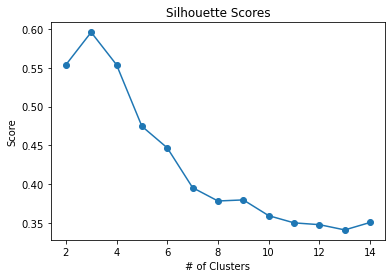

In [69]:
silhouette_list = []

for k in range(2,15):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    silhouette_list.append(silhouette_score(X_scaled, kmeans.labels_))
    
plt.plot(range(2, 15), silhouette_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Silhouette Scores');

---

In [27]:
X = df[['dance_valence', 'popularity']]

In [36]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
km = KMeans(n_clusters = 4, random_state = 42)
km.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [37]:
df['cluster'] = km.labels_
df.head()

,artist_name,artist_genre,track_name,track_id,popularity,danceability,energy,key,loudness,mode,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,dance_valence,cluster,color
0,Frank Ocean,"['hip hop', 'lgbtq+ hip hop', 'neo soul', 'pop']",Lost,3GZD6HmiNUhxXYf8Gch723,85,0.913,0.603,8,-4.892,1,...,0.02720,0.000503,0.1670,0.497,123.061,234093,4,0.453761,2,red
1,David Bowie,"['art rock', 'classic rock', 'glam rock', 'per...",Five Years - 2012 Remaster,1JIzFhI9Lt5FyslawmHCBi,59,0.460,0.326,7,-10.699,1,...,0.14200,0.000010,0.0449,0.321,152.531,283753,3,0.147660,0,green
2,Kendrick Lamar,"['conscious hip hop', 'hip hop', 'rap', 'west ...",Money Trees,2HbKqm4o0w5wEeEFXm2sD4,79,0.716,0.531,7,-7.355,1,...,0.07030,0.000000,0.2240,0.344,71.994,386907,4,0.246304,0,green
3,Electro Dark Project,[],Year 2012,6AXz0oyVU4oXh9Tb98TXMd,0,0.501,0.687,0,-4.657,1,...,0.00419,0.000031,0.1230,0.542,164.092,214164,4,0.271542,1,blue
4,Chief Keef,"['chicago bop', 'chicago drill', 'chicago rap'...",Love Sosa,01Lr5YepbgjXAWR9iOEyH1,80,0.772,0.413,0,-8.193,0,...,0.03610,0.000000,0.1110,0.211,131.965,246213,4,0.162892,0,green


In [38]:
df.cluster.value_counts(normalize = True)

0    0.334857
1    0.287361
2    0.206180
3    0.171602
Name: cluster, dtype: float64

In [39]:
centroids = sc.inverse_transform(km.cluster_centers_)
centroids

array([[ 0.1931326 , 69.8974511 ],
       [ 0.16534941, 11.3317208 ],
       [ 0.51122095, 70.54440154],
       [ 0.48604158, 10.20069606]])

In [40]:
centroids = pd.DataFrame(centroids, columns = ['dance_valence', 'popularity'])
centroids

,dance_valence,popularity
0,0.193133,69.897451
1,0.165349,11.331721
2,0.511221,70.544402
3,0.486042,10.200696


<Figure size 720x576 with 0 Axes>

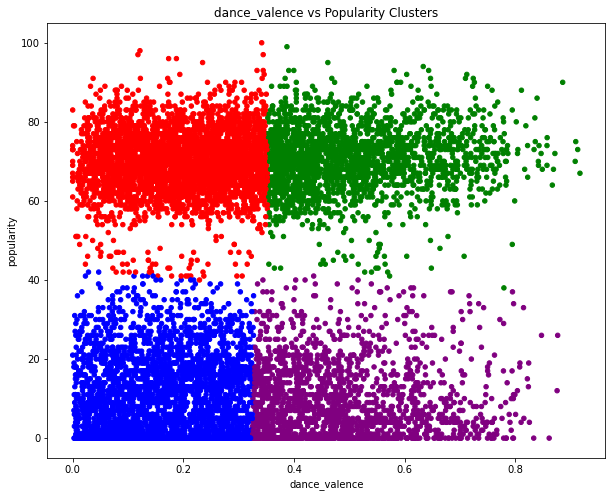

In [41]:
plt.figure(figsize=(10,8))

colors = ['red', 'blue', 'green', 'purple'] #, 'green', 'purple']
df['color'] = df['cluster'].map(lambda p: colors[p])

ax = df.plot(kind='scatter', x = 'dance_valence', y = 'popularity',
    figsize=(10,8),c = df['color'])

centroids.plot(kind='scatter', x = 'dance_valence', y = 'popularity', 
    marker='*', c=colors, s=550, ax=ax)

plt.title('dance_valence vs Popularity Clusters')
plt.xlabel('dance_valence')
plt.ylabel('popularity');

Text(0.5, 1.0, 'Inertia Scores')

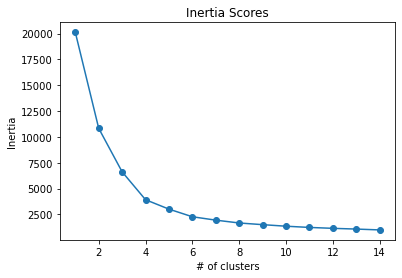

In [42]:
inertia_list = []

for k in range(1,15):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)
    
plt.plot(range(1,15), inertia_list, marker = 'o')
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.title('Inertia Scores')

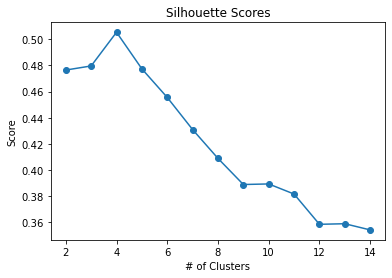

In [43]:
silhouette_list = []

for k in range(2,15):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    silhouette_list.append(silhouette_score(X_scaled, kmeans.labels_))
    
plt.plot(range(2, 15), silhouette_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Silhouette Scores');

---

In [106]:
X = df[['energy', 'tempo']]

In [107]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [108]:
df['cluster'] = km.labels_
df.head()

,artist_name,artist_genre,track_name,track_id,popularity,danceability,energy,key,loudness,mode,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,dance_valence,cluster,color
0,Frank Ocean,"['hip hop', 'lgbtq+ hip hop', 'neo soul', 'pop']",Lost,3GZD6HmiNUhxXYf8Gch723,85,0.913,0.603,8,-4.892,1,...,0.02720,0.000503,0.1670,0.497,123.061,234093,4,0.453761,0,red
1,David Bowie,"['art rock', 'classic rock', 'glam rock', 'per...",Five Years - 2012 Remaster,1JIzFhI9Lt5FyslawmHCBi,59,0.460,0.326,7,-10.699,1,...,0.14200,0.000010,0.0449,0.321,152.531,283753,3,0.147660,2,green
2,Kendrick Lamar,"['conscious hip hop', 'hip hop', 'rap', 'west ...",Money Trees,2HbKqm4o0w5wEeEFXm2sD4,79,0.716,0.531,7,-7.355,1,...,0.07030,0.000000,0.2240,0.344,71.994,386907,4,0.246304,1,blue
3,Electro Dark Project,[],Year 2012,6AXz0oyVU4oXh9Tb98TXMd,0,0.501,0.687,0,-4.657,1,...,0.00419,0.000031,0.1230,0.542,164.092,214164,4,0.271542,2,green
4,Chief Keef,"['chicago bop', 'chicago drill', 'chicago rap'...",Love Sosa,01Lr5YepbgjXAWR9iOEyH1,80,0.772,0.413,0,-8.193,0,...,0.03610,0.000000,0.1110,0.211,131.965,246213,4,0.162892,1,red


In [109]:
centroids = sc.inverse_transform(km.cluster_centers_)
centroids

array([[  0.81878827, 118.95748627],
       [  0.42650808, 100.49415351],
       [  0.6050126 , 155.7378688 ]])

In [110]:
centroids = pd.DataFrame(centroids, columns = ['energy', 'tempo'])
centroids

,energy,tempo
0,0.818788,118.957486
1,0.426508,100.494154
2,0.605013,155.737869


<Figure size 720x576 with 0 Axes>

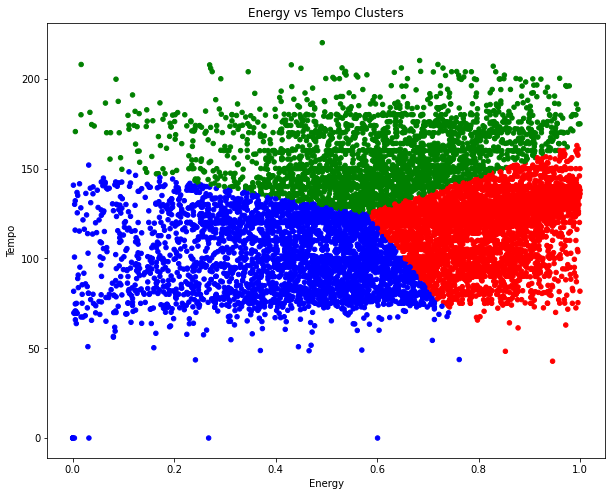

In [111]:
plt.figure(figsize=(10,8))

colors = ['red', 'blue', 'green'] #, 'green', 'purple']
df['color'] = df['cluster'].map(lambda p: colors[p])

ax = df.plot(kind='scatter', x = 'energy', y = 'tempo',
    figsize=(10,8),c = df['color'])

centroids.plot(kind='scatter', x = 'energy', y = 'tempo', 
    marker='*', c=colors, s=550, ax=ax)

plt.title('Energy vs Tempo Clusters')
plt.xlabel('Energy')
plt.ylabel('Tempo');

Text(0.5, 1.0, 'Inertia Scores')

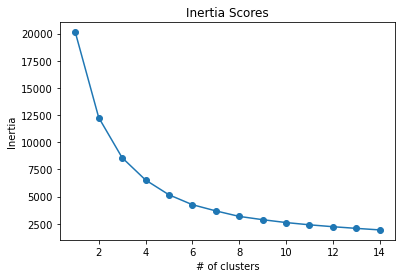

In [112]:
inertia_list = []

for k in range(1,15):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)
    
plt.plot(range(1,15), inertia_list, marker = 'o')
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.title('Inertia Scores')

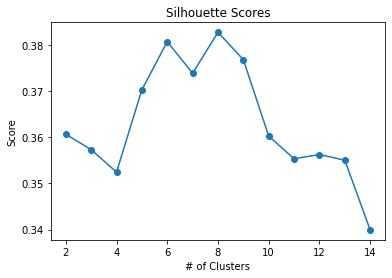

In [113]:
silhouette_list = []

for k in range(2,15):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    silhouette_list.append(silhouette_score(X_scaled, kmeans.labels_))
    
plt.plot(range(2, 15), silhouette_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Silhouette Scores');

## DBSCAN

In [13]:
dbscan = DBSCAN(eps = 0.18)
dbscan.fit(X_scaled)

DBSCAN(eps=0.18)

In [14]:
pd.Series(dbscan.labels_).unique()

array([ 0, -1], dtype=int64)

In [15]:
silhouette_score(X_scaled, dbscan.labels_)

0.3407691571199279

In [16]:
df['cluster'] = dbscan.labels_

df.cluster.value_counts(normalize = True)

 0    0.997317
-1    0.002683
Name: cluster, dtype: float64

<Figure size 720x576 with 0 Axes>

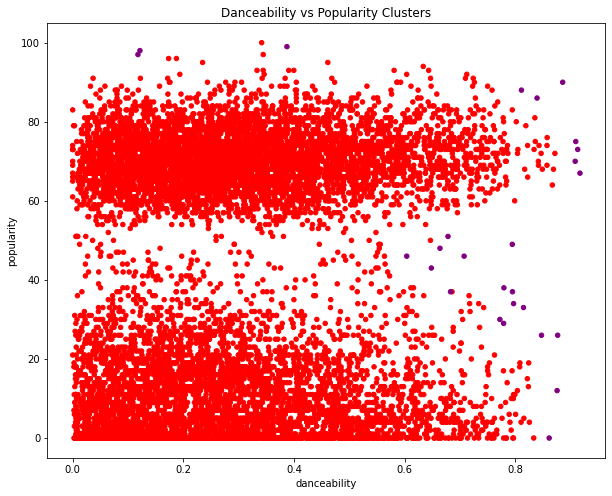

In [17]:
plt.figure(figsize=(10,8))

colors = ['red', 'blue', 'green', 'purple']
df['color'] = df['cluster'].map(lambda p: colors[p])

ax = df.plot(kind='scatter', x = 'dance_valence', y = 'popularity',
    figsize=(10,8),c = df['color'])

plt.title('Danceability vs Popularity Clusters')
plt.xlabel('danceability')
plt.ylabel('popularity');